In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import k_means

In [ ]:
df = pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
X = df.iloc[:,[3,4]].values

In [ ]:
wcss =[]
for i in range(1,11):
  kmeans = k_means(X,n_clusters =i,init='k-means++')[2]
  wcss.append(kmeans)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
wcss

[269981.28,
 183069.17582751298,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37265.86520484346,
 30273.394312070042,
 25044.967764018933,
 21884.744095710274,
 19676.6125856028]

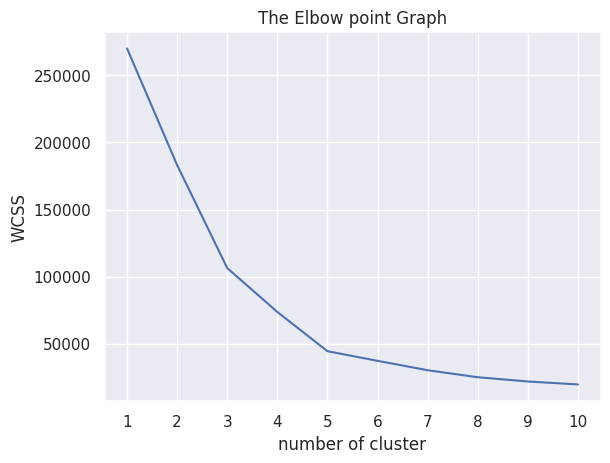

In [ ]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title("The Elbow point Graph")
plt.xticks(range(1,11))
plt.xlabel("number of cluster")
plt.ylabel("WCSS")
plt.show()

In [ ]:
centroids, labels, inertia = k_means(X, n_clusters=5, n_init="auto", random_state=0)
Y = labels

Text(0, 0.5, 'spending score')

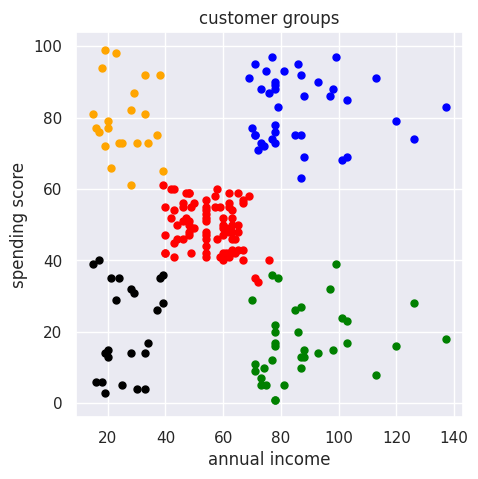

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(X[Y==0,0],X[Y==0,1],s=25,c='green',label = 'Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=25,c='red',label = 'Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=25,c='blue',label = 'Cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=25,c='orange',label = 'Cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=25,c='black',label = 'Cluster 5')
plt.title("customer groups")
plt.xlabel("annual income")
plt.ylabel("spending score")
